<a href="https://colab.research.google.com/github/nikesh11xx/nikesh11xx/blob/main/Data_cleaning_full_tips.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# loading  library and data set

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

data = pd.read_csv('/content/loan_data_set.csv')

In [ ]:
data.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [ ]:
data.shape

(614, 13)

In [ ]:
# checking missing value
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
total_missing_values_in_dataset = data.isnull().sum().sum()
print('total missing values in dataset ',total_missing_values_in_dataset)

total missing values in dataset  149


In [ ]:
# missing value in percentage

# (data.isnull().sum()/data.shape[0])*100

missing_values = data.isnull().sum()
total_values = len(data)
missing_percentage = (missing_values / total_values) * 100
print("Missing values percentage:")
print(missing_percentage)


Missing values percentage:
Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64


In [ ]:
total_missing_value = (data.isnull().sum().sum()/(len(data)*data.shape[1]))*100
print('total missing value ',total_missing_value)

total missing value  1.8667000751691305


<Axes: >

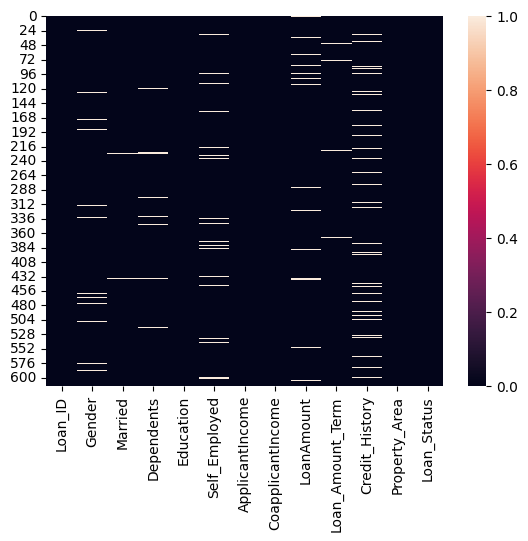

In [ ]:
# ploting heatmap for missing values
sns.heatmap(data.isnull())

In [30]:
# copy data
df = data.copy()

# Handeling missing values

In [23]:
# deleting columns
df.drop(columns= ['Credit_History'],inplace=True)

In [ ]:
df.shape

(614, 12)

In [ ]:
# to delete all rows which have missing value
df.dropna(inplace=True)

In [ ]:
df.shape

(523, 12)

In [ ]:
((614-523)/614)*100
# we have loss 14.82 percentage of data by  droping rows

14.82084690553746

#Handaling missing values (imputinng category data)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [31]:
# backword filling,forword filling and mod filling

# df.fillna(method='ffill',axis=1)

df['Gender'].fillna(df['Gender'].mode()[0],inplace = True)

In [32]:
# filling missing value with mode in categorical columns

for i in df.select_dtypes(include='object').isnull().columns:
  df[i].fillna(df[i].mode()[0],inplace=True)

In [33]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [35]:
# convert the data type of a columns int to float

df['ApplicantIncome'] = df['ApplicantIncome'].astype(float)


In [36]:
df.select_dtypes(include='float').columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

In [37]:
si = SimpleImputer(strategy='median')
ar = si.fit_transform(df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History']])

In [38]:
new_df = pd.DataFrame(ar,columns=df.select_dtypes(include='float').columns)

In [39]:
new_df.isnull().sum()

ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
dtype: int64

#ONE HOT ENCODING AND DUMMY VARIABLES

In [43]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
# df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)

In [44]:
en_df = df[['Gender','Married']]

In [46]:
# Get_dummies() method
pd.get_dummies(en_df).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Gender_Female  614 non-null    uint8
 1   Gender_Male    614 non-null    uint8
 2   Married_No     614 non-null    uint8
 3   Married_Yes    614 non-null    uint8
dtypes: uint8(4)
memory usage: 2.5 KB


In [47]:
from sklearn.preprocessing  import OneHotEncoder

In [53]:
ohe = OneHotEncoder(drop='first')
ohe.fit_transform(en_df)

<614x2 sparse matrix of type '<class 'numpy.float64'>'
	with 903 stored elements in Compressed Sparse Row format>

In [54]:
# converting this to tghe array
arr = ohe.fit_transform(en_df).toarray()
arr

array([[1., 0.],
       [1., 1.],
       [1., 1.],
       ...,
       [1., 1.],
       [1., 1.],
       [0., 0.]])

In [56]:
pd.DataFrame(arr,columns=['Gender_Male','Married_Yes'])

,Gender_Male,Married_Yes
0,1.0,0.0
1,1.0,1.0
2,1.0,1.0
3,1.0,1.0
4,1.0,0.0
...,...,...
609,0.0,0.0
610,1.0,1.0
611,1.0,1.0
612,1.0,1.0


# Label  Encoding

- Nominal  data - The nominal  data is expressed in number or words but they cannot have order and tgey do  not have any numerical properties

In [57]:
dff =  pd.DataFrame({'name':['dog','cat','monkey','black','cow']})

In [61]:
from sklearn.preprocessing import LabelEncoder

In [62]:
le = LabelEncoder()
dff['en_name'] = le.fit_transform(dff['name'])
dff

,name,en_name
0,dog,3
1,cat,1
2,monkey,4
3,black,0
4,cow,2


In [63]:
df.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y


In [65]:
laa = LabelEncoder()
laa.fit(df['Property_Area'])

LabelEncoder()

In [66]:
df['Property_Area'] = laa.transform(df['Property_Area'])

array([2, 0, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       1, 0, 1, 1, 1, 2, 2, 1, 2, 2, 0, 1, 0, 2, 2, 1, 2, 1, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 1, 1, 0, 2, 2, 2, 2, 0, 0, 1, 1,
       2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1,
       2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2, 2, 0, 2, 1,
       2, 1, 0, 1, 1, 0, 1, 2, 0, 2, 0, 1, 1, 1, 0, 0, 0, 0, 2, 0, 2, 2,
       1, 1, 1, 1, 0, 2, 1, 0, 0, 2, 1, 1, 2, 1, 2, 2, 0, 1, 0, 0, 2, 0,
       2, 1, 0, 2, 0, 1, 1, 2, 1, 0, 2, 0, 0, 0, 1, 1, 0, 2, 0, 1, 1, 0,
       0, 1, 1, 2, 2, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 0, 2,
       1, 2, 1, 1, 2, 2, 1, 1, 2, 0, 2, 1, 1, 1, 2, 0, 2, 1, 0, 1, 1, 1,
       2, 1, 1, 1, 1, 0, 2, 1, 1, 0, 1, 0, 0, 1, 1, 0, 2, 2, 0, 1, 0, 2,
       2, 0, 1, 2, 2, 2, 1, 2, 1, 2, 0, 1, 2, 0, 0, 2, 0, 1, 2, 1, 1, 0,
       1, 0, 1, 2, 0, 2, 2, 2, 0, 1, 1, 1, 1, 2, 1, 0, 2, 1, 2, 2, 0, 0,
       1, 0, 1, 0, 0, 1, 2, 2, 1, 2, 1, 2, 0, 2, 2,

# Ordinal Encoding


In [71]:
df1 =  pd.DataFrame({'size':['s','m','l','m','s','s','s']})
df1.head(2)

,size
0,s
1,m


In [68]:
ord_data = [['s','m','l']]

In [69]:
from sklearn.preprocessing import OrdinalEncoder

In [72]:
oe = OrdinalEncoder(categories=ord_data)
oe.fit(df1[['size']])

OrdinalEncoder(categories=[['s', 'm', 'l']])

In [73]:
df1['Size_en'] = oe.transform(df1[['size']])
df1

,size,Size_en
0,s,0.0
1,m,1.0
2,l,2.0
3,m,1.0
4,s,0.0
5,s,0.0
6,s,0.0


In [75]:
# map function

ord_df = {'s':0,'m':1,'l':2}

df1['Size_en_map'] = df1['size'].map(ord_df)
df1

,size,Size_en,Size_en_map
0,s,0.0,0
1,m,1.0,1
2,l,2.0,2
3,m,1.0,1
4,s,0.0,0
5,s,0.0,0
6,s,0.0,0


In [77]:
df['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [78]:
en_dta_ord = [['Urban', 'Rural', 'Semiurban']]

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
oen = OrdinalEncoder(categories = en_dta_ord)

df['Property_Area'] = oen.fit_transform(df[['Property_Area']])


In [83]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,NaN,360.0,1.0,0.0,Y
1,LP001003,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,1.0,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,0.0,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,0.0,Y
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,0.0,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900.0,0.0,71.0,360.0,1.0,1.0,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106.0,0.0,40.0,180.0,1.0,1.0,Y
611,LP002983,Male,Yes,1,Graduate,No,8072.0,240.0,253.0,360.0,1.0,0.0,Y
612,LP002984,Male,Yes,2,Graduate,No,7583.0,0.0,187.0,360.0,1.0,0.0,Y


# HANDELINNG OUTLIER

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    float64
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    float64
 12  Loan_Status        614 non-null    object 
dtypes: float64(6), object(7)
memory usage: 62.5+ KB


In [85]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
count,614.000000,614.000000,592.000000,600.00000,564.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199,1.050489
std,6109.041673,2926.248369,85.587325,65.12041,0.364878,0.840875
min,150.000000,0.000000,9.000000,12.00000,0.000000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000,0.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000,2.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000,2.000000


<Axes: xlabel='CoapplicantIncome'>

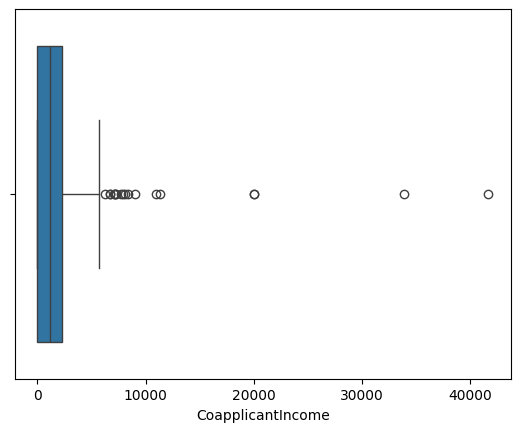

In [86]:
sns.boxplot(x= df['CoapplicantIncome'],data=df)

<ipython-input-87-fa3d0fdb862e>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['CoapplicantIncome'])


<Axes: xlabel='CoapplicantIncome', ylabel='Density'>

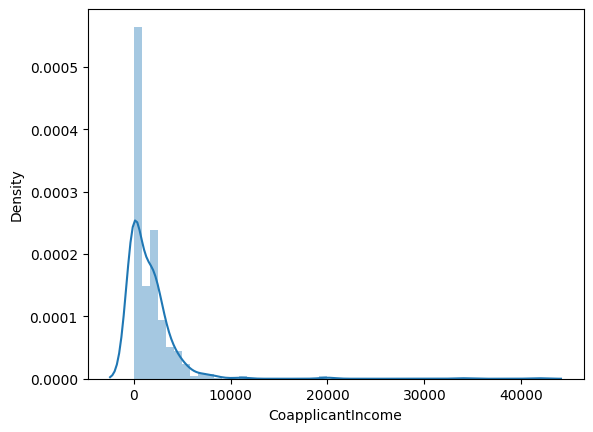

In [87]:
sns.distplot(df['CoapplicantIncome'])

In [88]:
l= [ 5,6,7,8,9,12]
sum(l)/len(l)

7.833333333333333

# OUTLIER REMOVIMG

In [89]:
q1 = df['CoapplicantIncome'].quantile(0.25)
q3 = df['CoapplicantIncome'].quantile(0.75)


In [90]:
IQR = q3-q1

In [91]:
IQR

2297.25

In [93]:
min_range = q1 - (1.5*IQR)
max_range = q3 + (1.5 * IQR)
min_range ,max_range


(-3445.875, 5743.125)

In [94]:
new_dataset1 = df[df['CoapplicantIncome']<= max_range]
new_dataset1

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,NaN,360.0,1.0,0.0,Y
1,LP001003,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,1.0,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,0.0,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,0.0,Y
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,0.0,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900.0,0.0,71.0,360.0,1.0,1.0,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106.0,0.0,40.0,180.0,1.0,1.0,Y
611,LP002983,Male,Yes,1,Graduate,No,8072.0,240.0,253.0,360.0,1.0,0.0,Y
612,LP002984,Male,Yes,2,Graduate,No,7583.0,0.0,187.0,360.0,1.0,0.0,Y


<Axes: xlabel='CoapplicantIncome'>

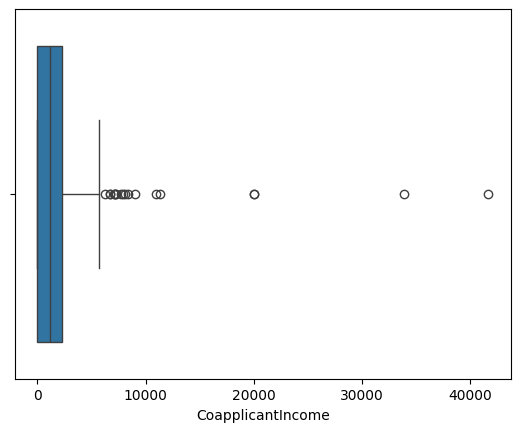

In [95]:
sns.boxplot(x=df['CoapplicantIncome'],data= new_dataset1)

# OUTLIER REMOVAL USING Z SCORE

<ipython-input-99-687f6a9f35fd>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x= df['CoapplicantIncome'])


<Axes: ylabel='Density'>

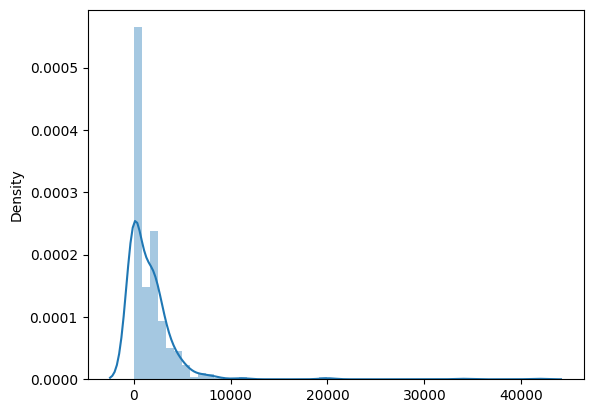

In [99]:
sns.distplot(x= df['CoapplicantIncome'])

In [100]:
min_range = df['CoapplicantIncome'].mean() - (3*df['CoapplicantIncome'].std())
max_range = df['CoapplicantIncome'].mean() + (3*df['CoapplicantIncome'].std())

In [101]:
min_range,max_range

(-7157.4993096454655, 10399.990905699668)

In [105]:
new_df11 = df[df['CoapplicantIncome']<=max_range]

In [108]:
z_score = (new_df11['CoapplicantIncome'] - new_df11['CoapplicantIncome'].mean()) / new_df11['CoapplicantIncome'].std()

In [113]:
new_df11['z_score'] = z_score

<ipython-input-113-60cbb1bc60fc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df11['z_score'] = z_score


In [116]:
new_df11[new_df11['z_score']<3]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,z_score
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,NaN,360.0,1.0,0.0,Y,-0.837037
1,LP001003,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,1.0,N,0.057767
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,0.0,Y,-0.837037
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,0.0,Y,0.562132
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,0.0,Y,-0.837037
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900.0,0.0,71.0,360.0,1.0,1.0,Y,-0.837037
610,LP002979,Male,Yes,3+,Graduate,No,4106.0,0.0,40.0,180.0,1.0,1.0,Y,-0.837037
611,LP002983,Male,Yes,1,Graduate,No,8072.0,240.0,253.0,360.0,1.0,0.0,Y,-0.694628
612,LP002984,Male,Yes,2,Graduate,No,7583.0,0.0,187.0,360.0,1.0,0.0,Y,-0.837037


In [117]:
new_df11.shape

(608, 14)

# FEATURE SCALING
- Normalization: it is a scaling technique in which values are shifted and rescaled so that they end up ranging between 0 and 1 it is also known as min- max scaling

In [120]:
new_df11.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       49
Property_Area         0
Loan_Status           0
z_score               0
dtype: int64

In [121]:
new_df11.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,z_score
count,608.000000,608.000000,586.000000,594.000000,559.000000,608.000000,6.080000e+02
mean,5416.143092,1410.646250,145.136519,342.121212,0.842576,1.050987,-2.921640e-17
std,6123.586316,1685.286222,83.825124,65.088956,0.364526,0.839137,1.000000e+00
min,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,-8.370366e-01
25%,2892.750000,0.000000,100.000000,360.000000,1.000000,0.000000,-8.370366e-01
50%,3813.500000,1125.500000,127.500000,360.000000,1.000000,1.000000,-1.691975e-01
75%,5803.750000,2250.750000,165.750000,360.000000,1.000000,2.000000,4.984932e-01
max,81000.000000,8980.000000,700.000000,480.000000,1.000000,2.000000,4.491435e+00


<ipython-input-125-ce795ece0d9a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df11['CoapplicantIncome'])


<Axes: xlabel='CoapplicantIncome', ylabel='Density'>

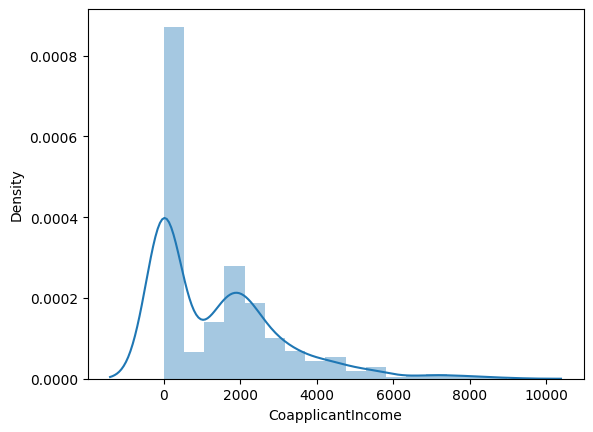

In [125]:
sns.distplot(new_df11['CoapplicantIncome'])

In [126]:
from sklearn.preprocessing import MinMaxScaler

In [127]:
ms = MinMaxScaler()
ms.fit(new_df11[['CoapplicantIncome']])

MinMaxScaler()

In [128]:
new_df11['CoapplicantIncome'] = ms.transform(new_df11[['CoapplicantIncome']])

<ipython-input-128-a3fefa3c1c1f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df11['CoapplicantIncome'] = ms.transform(new_df11[['CoapplicantIncome']])


<ipython-input-135-3bd8b68b3c00>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df11['CoapplicantIncome'])
<ipython-input-135-3bd8b68b3c00>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df11['CoapplicantIncome'])


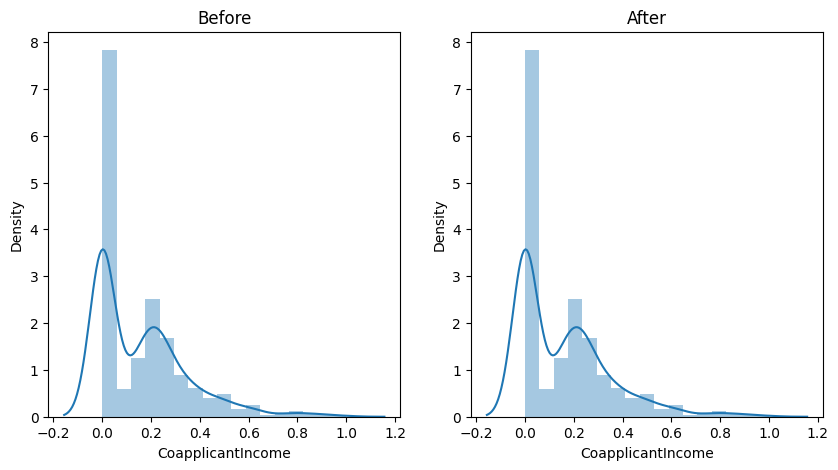

In [135]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('Before')
sns.distplot(new_df11['CoapplicantIncome'])

plt.subplot(1,2,2)
plt.title('After')
sns.distplot(new_df11['CoapplicantIncome'])

plt.show()

# Handling duplicate data

In [155]:
dict1 = {'name':['a','b','c','d','a','c'],'eng':[8,7,5,8,8,5],'hindi':[2,3,4,5,2,6]}

In [156]:
dict11 = pd.DataFrame(dict1)

In [157]:
dict11

,name,eng,hindi
0,a,8,2
1,b,7,3
2,c,5,4
3,d,8,5
4,a,8,2
5,c,5,6


In [159]:
dx = data.copy()

In [162]:
dx.shape

(614, 13)

In [163]:
dx.drop_duplicates(inplace=True)

In [170]:
dx['Dependents'].value_counts()

0    360
1    102
2    101
3     51
Name: Dependents, dtype: int64

In [167]:
# mode filling
dx['Dependents'].fillna(dx['Dependents'].mode()[0],inplace=True)

In [169]:
# replacing 3+ to 3
dx['Dependents'].replace('3+',3,  inplace = True)

In [173]:
#  changing data type
dx['Dependents'] = dx['Dependents'].astype('int32')

In [176]:
dx.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         614 non-null    int32  
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int32(1), int64(1), object(7)
memory usage: 64.8+ KB


In [178]:
dx.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents            0
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<ipython-input-179-380a735292e1>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=dx['CoapplicantIncome'])


<Axes: ylabel='Density'>

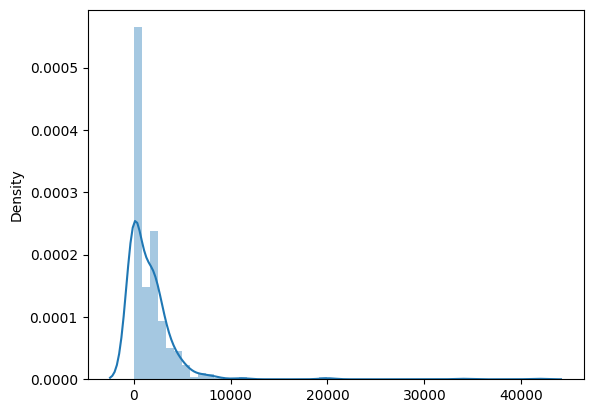

In [179]:
sns.distplot(x=dx['CoapplicantIncome'])

In [182]:
q1 = dx['CoapplicantIncome'].quantile(0.25)
q3 = dx['CoapplicantIncome'] .quantile(0.75)

IQR = q3 - q1

In [183]:
min_r = q1 - (1.5*IQR)
max_r = q3 + (1.5*IQR)

min_r, max_r


(-3445.875, 5743.125)

In [186]:
dx = dx[dx['CoapplicantIncome'] <= max_r]

<ipython-input-187-1e386468fb80>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dx['CoapplicantIncome'])


<Axes: xlabel='CoapplicantIncome', ylabel='Density'>

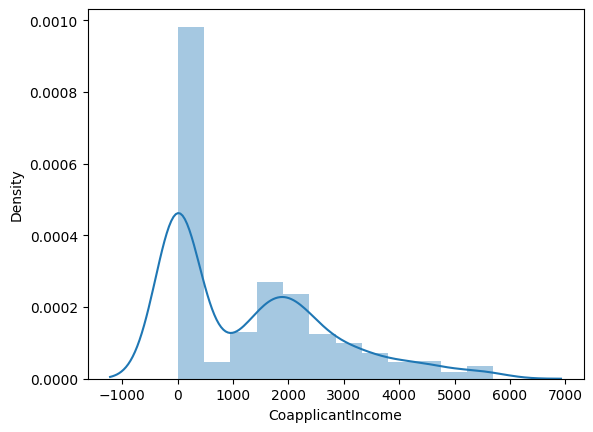

In [187]:
sns.distplot(dx['CoapplicantIncome'])

In [188]:
from sklearn.preprocessing import FunctionTransformer

In [192]:
ft = FunctionTransformer(func=np.log1p)

In [194]:
ft.fit(dx[['CoapplicantIncome']])

FunctionTransformer(func=<ufunc 'log1p'>)

In [196]:
dx['CoapplicantIncome_tf'] = ft.transform(dx[['CoapplicantIncome']])

<ipython-input-196-270efc7e3d9a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dx['CoapplicantIncome_tf'] = ft.transform(dx[['CoapplicantIncome']])


<ipython-input-199-d4175068d60e>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=dx['CoapplicantIncome'])
<ipython-input-199-d4175068d60e>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=dx['CoapplicantIncome_tf'])


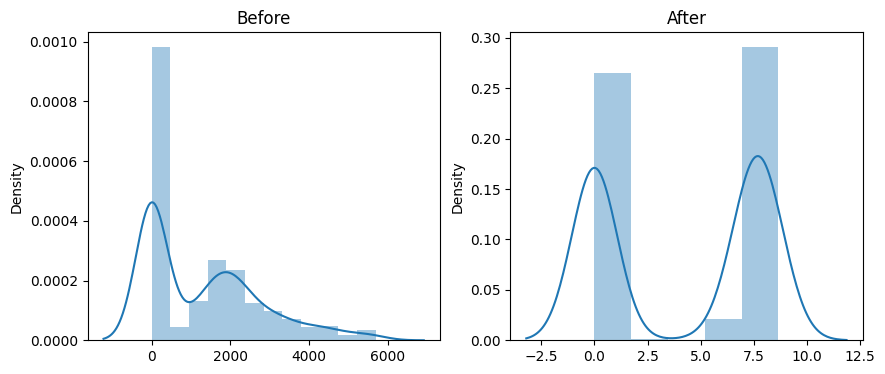

In [199]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.distplot(x=dx['CoapplicantIncome'])
plt.title('Before')

plt.subplot(1,2,2)
sns.distplot(x=dx['CoapplicantIncome_tf'])
plt.title('After')

plt.show()